# Simulación Montecarlo

En esta ocasión haremos una simulación de inversión en la bolsa.Queremos saber el margen de ganancia que podemos esperar en esta situación con una determinada cantidad de dinero invertida en diferentes empresas que están afectadas por sus respectivas posibles perdidas o aumentos de valor. 

In [3]:
import numpy as np

$R_p$ será el rendimiento que esta definido por las variables.

W se refiere a los fondos invertidos en determinada empresa.

R son los porcentajes de la ganancia o perdida de valor que sufrira.

$R_P = WR$

En principio la función a utilizar es la que se encuentra en la parte superior. Expresandola a inversión en diferentes empresas. (Empresa 1, Empresa 2, etc. ) es como se utilizará.

$R_p = W1*R1 + W2*R2 + W3*R3 ....$

In [4]:
W1,W2 = [.8,.2]
r1 = [.3,-.7,-.45,.0]
r2 = [.1,.05,-.9,.2]

Ya tenemos las variables con sus valores definidos.

In [5]:
gen = lambda x,y: np.random.choice(x)* W1 + np.random.choice(y)*W2
R_p = [gen(r1,r2) for i in range(10000)]

En este caso buscamos encontrar el comportamiento en el caso de repetirlo 10,000 veces. 

(array([ 644., 1917.,  634., 1254.,  622.,  586.,    0., 2493.,    0.,
        1850.]),
 array([-0.74 , -0.638, -0.536, -0.434, -0.332, -0.23 , -0.128, -0.026,
         0.076,  0.178,  0.28 ]),
 <a list of 10 Patch objects>)

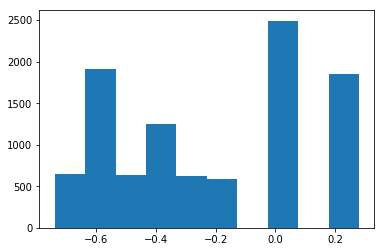

In [8]:
import matplotlib.pyplot as plt
plt.hist(R_p)

In [7]:
from scipy import stats
stats.describe(R_p)

DescribeResult(nobs=10000, minmax=(-0.74, 0.28), mean=-0.20150400000000002, variance=0.10486208419241924, skewness=0.04969623054120058, kurtosis=-1.3412490331558393)

Podemos ver que en este caso se esperan resultados que tienden a una perdida. Se espera una perdida de 0.2 con una varianza de 0.1 y un leve tilde a la derecha.

# Pandas

In [9]:
import pandas as pd
from sklearn import datasets

Primeramente conseguimos una base de datos con la cual trabajar. En este caso conseguimos una que no nos obligue a trabajar con un .csv en nuestro ordenador. Iris es una base de datos que mide atributus de una planta. En este caso cada una de las 4 columnas, respectivamente de izquierda a derecha, nos da...

1.Largo del sépalo

2.Ancho del sépalo

3.Largo del pétalo

4.Ancho del pétalo

In [10]:
iris=datasets.load_iris()

In [11]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

Le asignamos los nombres a las columnas y agregamos dos adicionales que nos muestral el cuadrado del tamaño de las dos primeras. Agregamos otra columna cuyo valor sea igual a la suma de todos los largos y finalmente otras dos que comparen las diferencias de los largos entre los pétalos y los sépalos.

In [30]:
df =pd.DataFrame(iris.data,columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
df['sepal lenght^2']=df.apply(lambda x:x[0]**2,axis=1)
df['sepal width^2']=df.apply(lambda x:x[1]**2,axis=1)
df['Sum']=df.apply(lambda x:x[0]+x[1]+x[2]+x[3],axis=1)
df['Difference in length']=df.apply(lambda x:x[0]-x[2],axis=1)
df['Difference in width']=df.apply(lambda x:x[1]-x[3],axis=1)

In [31]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal lenght^2,sepal width^2,Sum,Difference in length,Difference in width
0,5.1,3.5,1.4,0.2,26.01,12.25,10.2,3.7,3.3
1,4.9,3.0,1.4,0.2,24.01,9.00,9.5,3.5,2.8
2,4.7,3.2,1.3,0.2,22.09,10.24,9.4,3.4,3.0
3,4.6,3.1,1.5,0.2,21.16,9.61,9.4,3.1,2.9
4,5.0,3.6,1.4,0.2,25.00,12.96,10.2,3.6,3.4
5,5.4,3.9,1.7,0.4,29.16,15.21,11.4,3.7,3.5
6,4.6,3.4,1.4,0.3,21.16,11.56,9.7,3.2,3.1
7,5.0,3.4,1.5,0.2,25.00,11.56,10.1,3.5,3.2
8,4.4,2.9,1.4,0.2,19.36,8.41,8.9,3.0,2.7
9,4.9,3.1,1.5,0.1,24.01,9.61,9.6,3.4,3.0
